In [81]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

science2k_doc_word = np.load("science2k-doc-word.npy")
science2k_word_doc = np.load("science2k-word-doc.npy")
science2k_vocab = open("science2k-vocab.txt")
vocabs = [line[:-1] for line in science2k_vocab]
science2k_titles = open("science2k-titles.txt")
titles = [line[:-1] for line in science2k_titles]

science2k_doc_word.shape


(1373, 5476)

a) cluster for doc-word

In [111]:
science2k_doc_word.shape

(1373, 5476)

2(a)

In [83]:
#Running kMeans along with elbow to figure out optimum K [https://pythonprogramminglanguage.com/kmeans-elbow-method/]
distortions = [] 
k_range = range(1,21)
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(science2k_doc_word)
    y_kmeans = kmeans.predict(science2k_doc_word)
    distortions.append(sum(np.min(cdist(science2k_doc_word, kmeans.cluster_centers_, 'euclidean'), axis=1)) / science2k_doc_word.shape[0])
    print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clus

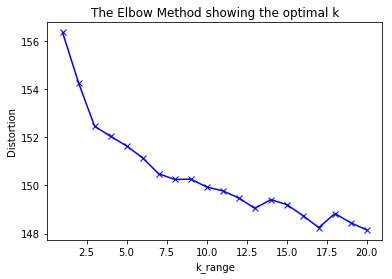

In [84]:
# Plot the elbow
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('k_range')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [132]:
#Optimal K for this dataset is k=3
first_optimum_kmeans = KMeans(n_clusters=3).fit(science2k_doc_word)
first_optimum_y_kmeans = first_optimum_kmeans.predict(science2k_doc_word)
first_optimum_centroids = first_optimum_kmeans.cluster_centers_  
print (len(first_optimum_y_kmeans))


### TOP TEN VALUE FOR FIRST CLUSTER
#stores indexes of doc which belongs to first cluster 
first_cluster = np.array([i for i, val in enumerate(first_optimum_y_kmeans) if val == 0])
#take the values for each index perform euclidean distance and sort them 
distances_first_cluster = np.argsort(np.array([np.linalg.norm(first_optimum_centroids[0]- science2k_doc_word[i]) for i in first_cluster]))

top_ten_first_cluster = [first_cluster[i] for i in distances_first_cluster[:10]]
print (top_ten_first_cluster)

first_cluster_top10_titles = [titles[i] for i in top_ten_first_cluster]
print (first_cluster_top10_titles)

1373
[997, 968, 541, 1314, 983, 767, 370, 704, 1000, 1032]
['"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"', '"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"', '"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"', '"Efficient Initiation of HCV RNA Replication in Cell Culture"', '"Ubiquitination: More Than Two to Tango"', '"Negative Regulation of the SHATTERPROOF Genes by FRUITFULL during Arabidopsis Fruit Development"', '"T Cell-Independent Rescue of B Lymphocytes from Peripheral Immune Tolerance"', '"Reduced Food Intake and Body Weight in Mice Treated with Fatty Acid Synthase Inhibitors"', '"Patterning of the Zebrafish Retina by a Wave of Sonic Hedgehog Activity"', '"Active Remodeling of Somatic Nuclei in Egg Cytoplasm by the Nucleosomal ATPase ISWI"']


In [133]:
### TOP TEN VALUE FOR SECOND CLUSTER [2]
#stores indexes of doc which belongs to first cluster 
second_cluster = np.array([i for i, val in enumerate(first_optimum_y_kmeans) if val == 1])
#take the values for each index perform euclidean distance and sort them 
distances_second_cluster = np.argsort(np.array([np.linalg.norm(first_optimum_centroids[1]- science2k_doc_word[i]) for i in second_cluster]))

top_ten_second_cluster = [second_cluster[i] for i in distances_second_cluster[:10]]
print (top_ten_second_cluster)

second_cluster_top10_titles = [titles[i] for i in top_ten_second_cluster]
print (second_cluster_top10_titles)

[1281, 139, 1283, 724, 587, 797, 1227, 715, 159, 1359]
['"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"', '"Population Dynamical Consequences of Climate Change for a Small Temperate Songbird"', '"Nitric Acid Trihydrate (NAT) in Polar Stratospheric Clouds"', '"Subducted Seamount Imaged in the Rupture Zone of the 1946 Nankaido Earthquake"', '"A Monoclinic Post-Stishovite Polymorph of Silica in the Shergotty Meteorite"', '"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"', '"Crossing the Hopf Bifurcation in a Live Predator-Prey System"', '"Earth\'s Enigmatic Interface"', '"Ambipolar Pentacene Field-Effect Transistors and Inverters"', '"Reconstruction of the Amazon Basin Effective Moisture Availability over the past 14,000 Years"']


In [134]:
### TOP TEN VALUE FOR SECOND CLUSTER [3]
#stores indexes of doc which belongs to first cluster 
third_cluster = np.array([i for i, val in enumerate(first_optimum_y_kmeans) if val == 2])
#take the values for each index perform euclidean distance and sort them 
distances_third_cluster = np.argsort(np.array([np.linalg.norm(first_optimum_centroids[1]- science2k_doc_word[i]) for i in third_cluster]))

top_ten_third_cluster = [third_cluster[i] for i in distances_third_cluster[:10]]
print (top_ten_third_cluster)

third_cluster_top10_titles = [titles[i] for i in top_ten_third_cluster]
print (third_cluster_top10_titles)

[519, 574, 90, 302, 122, 123, 124, 431, 73, 489]
['"Algorithmic Gladiators Vie for Digital Glory"', '"Reopening the Darkest Chapter in German Science"', '"Heretical Idea Faces Its Sternest Test"', '"Thermal, Catalytic, Regiospecific Functionalization of Alkanes"', '"Corrections and Clarifications: A Short Fe-Fe Distance in Peroxodiferric Ferritin: Control of Fe Substrate versus Cofactor Decay?"', '"Corrections and Clarifications: Charon\'s First Detailed Spectra Hold Many Surprises"', '"Corrections and Clarifications: Unearthing Monuments of the Yarmukians"', '"Movement Patterns in Spoken Language"', '"Information Storage and Retrieval through Quantum Phase"', '"Homogenization of Fish Faunas across the United States"']


2(b)

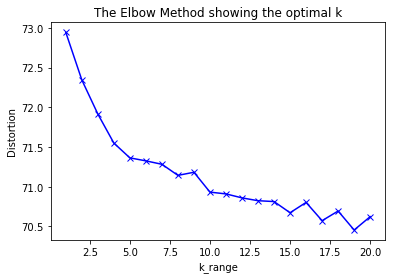

In [106]:
#Running kMeans along with elbow to figure out optimum K [https://pythonprogramminglanguage.com/kmeans-elbow-method/]
distortions_b = [] 
k_range_b = range(1,21)
for i in k_range:
    kmeans_b = KMeans(n_clusters=i).fit(science2k_word_doc)
    y_kmeans_b = kmeans_b.predict(science2k_word_doc)
    distortions_b.append(sum(np.min(cdist(science2k_word_doc, kmeans_b.cluster_centers_, 'euclidean'), axis=1)) / science2k_word_doc.shape[0])
    
# Plot the elbow
plt.plot(k_range_b, distortions_b, 'bx-')
plt.xlabel('k_range')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [122]:
#Optimal K for this dataset is k=5
second_optimum_kmeans = KMeans(n_clusters=5).fit(science2k_word_doc)
second_optimum_y_kmeans = second_optimum_kmeans.predict(science2k_word_doc)
second_optimum_centroids = second_optimum_kmeans.cluster_centers_  
print (len(second_optimum_y_kmeans))

### TOP TEN VALUE FOR FIRST CLUSTERS

for cluster_num in range (0,5):
    cluster = np.array([i for i, val in enumerate(second_optimum_y_kmeans) if val == cluster_num])
    #take the values for each index perform euclidean distance and sort them 
    distances_cluster = np.argsort(np.array([np.linalg.norm(second_optimum_centroids[0]- science2k_word_doc[i]) for i in cluster]))

    top_ten_cluster = [cluster[i] for i in distances_cluster[:10]]

    cluster_top10_titles = [vocabs[i] for i in top_ten_cluster]
    print (cluster_num)
    print (cluster_top10_titles)


5476
0
['correspondence', 'addressed', 'email', 'fig', 'reports', 'shown', 'indicated', 'respectively', 'observed', 'indicate']
1
['vol', 'sciencemag', 'org', 'end', 'science', 'rory', 'src42a', 'prpc', 'ist2p', 'calcyon']
2
['finished', 'trust', 'campaign', 'security', 'geneticist', 'pace', 'tech', 'vulnerable', 'raising', 'grew']
3
['www', 'start', 'dispersion', 'amplitudes', 'negligible', 'approximate', 'photon', 'simulated', 'lattice', 'finite']
4
['immunoblotting', 'tris', 'polyacrylamide', 'immunoprecipitated', 'biophys', 'lysates', 'plasmids', 'saline', 'immunoblot', 'assayed']
